In [161]:
#importar 532022.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima_model import ARIMAResults
from pymongo import MongoClient


client = MongoClient('localhost', 27017)
db = client['productos']
coleccion = db['productos']
print("Conectado a MongoDB")




Conectado a MongoDB


In [162]:
#imprimir todos los datos que tengan de nombre "Purina Cat Chow Defenseplus Gatitos Sabor Pescado Carne y Leche 1.5kg"
analisis = []
cursor = coleccion.find({"nombre": "Limpiador Multiusos LÃ­quido Fabuloso Antibacterial Lavanda 2L"})
for document in cursor:
    print(document)
    analisis.append(document)


{'_id': ObjectId('64307166e522cc4aa39aac39'), 'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'busqueda': 'Fabuloso', 'precio': '72.00', 'url': 'https://www.chedraui.com.mx/limpiador-multiusos-liquido-fabuloso-antibacterial-lavanda-2l-3086309/p', 'tienda': 'Chedraui', 'fecha': '2023-04-07'}
{'_id': ObjectId('643073257d070c556e5298db'), 'precio': '72.00', 'busqueda': 'Fabuloso', 'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'url': 'https://www.chedraui.com.mx/limpiador-multiusos-liquido-fabuloso-antibacterial-lavanda-2l-3086309/p', 'tienda': 'Chedraui', 'fecha': '2023-04-07', 'gramaje': 2000.0, 'precioPorGramo': 0.036, 'palabrasClaveEncontradas': ['limpiador', 'fabuloso', 'antibacterial', 'lavanda']}
{'_id': ObjectId('6431844abac03a0728da908f'), 'precio': '72.00', 'busqueda': 'Fabuloso', 'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'url': 'https://www.chedraui.com.mx/limpiador-multiusos-liq

In [163]:
#crear dataframe con los datos de la consulta
df = pd.DataFrame(analisis)



In [164]:
df

,_id,nombre,busqueda,precio,url,tienda,fecha,gramaje,precioPorGramo,palabrasClaveEncontradas
0,64307166e522cc4aa39aac39,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,72.00,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-04-07,NaN,NaN,NaN
1,643073257d070c556e5298db,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,72.00,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-04-07,2000.0,0.03600,"[limpiador, fabuloso, antibacterial, lavanda]"
2,6431844abac03a0728da908f,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,72.00,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-04-08,2000.0,0.03600,"[limpiador, fabuloso, antibacterial, lavanda]"
3,6432fc2fe24149dd9de24bab,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,72.00,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-04-09,2000.0,0.03600,"[limpiador, fabuloso, antibacterial, lavanda]"
4,647abf0df985b894d1ee4a6c,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,37.50,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-06-02,2000.0,0.01875,"[limpiador, fabuloso, antibacterial, lavanda]"
5,647c9e4d8f00924380a9b1b8,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,30.50,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-06-04,2000.0,0.01525,"[limpiador, fabuloso, antibacterial, lavanda]"
6,6480d982efa8a75b0a81d85f,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,40.00,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-06-07,2000.0,0.02000,"[limpiador, fabuloso, antibacterial, lavanda]"
7,6481f20f605bf450f586d6fb,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,40.00,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-06-08,2000.0,0.02000,"[limpiador, fabuloso, antibacterial, lavanda]"
8,64869330238eb7631ebf324d,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,30.50,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-06-11,2000.0,0.01525,"[limpiador, fabuloso, antibacterial, lavanda]"
9,64876de0d6682ceff9c97b40,Limpiador Multiusos LÃ­quido Fabuloso Antibact...,Fabuloso,30.50,https://www.chedraui.com.mx/limpiador-multiuso...,Chedraui,2023-06-12,2000.0,0.01525,"[limpiador, fabuloso, antibacterial, lavanda]"


In [165]:
analisis[1]

{'_id': ObjectId('643073257d070c556e5298db'),
 'precio': '72.00',
 'busqueda': 'Fabuloso',
 'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L',
 'url': 'https://www.chedraui.com.mx/limpiador-multiusos-liquido-fabuloso-antibacterial-lavanda-2l-3086309/p',
 'tienda': 'Chedraui',
 'fecha': '2023-04-07',
 'gramaje': 2000.0,
 'precioPorGramo': 0.036,
 'palabrasClaveEncontradas': ['limpiador',
  'fabuloso',
  'antibacterial',
  'lavanda']}

In [166]:
import datetime as dt
import numpy as np

# Fecha inicial
fecha_inicial = dt.datetime.strptime(analisis[1]['fecha'], '%Y-%m-%d')

# Iterar 10 veces a partir del 2023-04-09 para crear nuevos datos
for i in range(50):
    aletorio0 = np.random.randint(1, 5)
    fecha = fecha_inicial + dt.timedelta(i+aletorio0)
    # Crear un número aleatorio entre -2 y 2
    aleatorio = np.random.randint(-2, 2)
    # Convertir el precio a punto flotante y sumarle el número aleatorio
    precio = float(analisis[1]['precio']) + aleatorio
    print({'nombre': analisis[1]['nombre'], 'fecha': fecha.strftime('%Y-%m-%d'), 'precio': precio})
    # Insertar el nuevo documento en el dataframe
    df = df.append({'nombre': analisis[1]['nombre'], 'fecha': fecha, 'precio': precio}, ignore_index=True)
    


{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'fecha': '2023-04-09', 'precio': 72.0}
{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'fecha': '2023-04-11', 'precio': 73.0}
{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'fecha': '2023-04-13', 'precio': 70.0}
{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'fecha': '2023-04-14', 'precio': 73.0}
{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'fecha': '2023-04-14', 'precio': 71.0}
{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'fecha': '2023-04-16', 'precio': 72.0}
{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'fecha': '2023-04-15', 'precio': 70.0}
{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabuloso Antibacterial Lavanda 2L', 'fecha': '2023-04-18', 'precio': 71.0}
{'nombre': 'Limpiador Multiusos LÃ\xadquido Fabu

C:\Users\Adolfo\AppData\Local\Temp\ipykernel_9492\4080189246.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'nombre': analisis[1]['nombre'], 'fecha': fecha, 'precio': precio}, ignore_index=True)
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_9492\4080189246.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'nombre': analisis[1]['nombre'], 'fecha': fecha, 'precio': precio}, ignore_index=True)
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_9492\4080189246.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'nombre': analisis[1]['nombre'], 'fecha': fecha, 'precio': precio}, ignore_index=True)
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_9492\4080189246.py:17: FutureWarning:

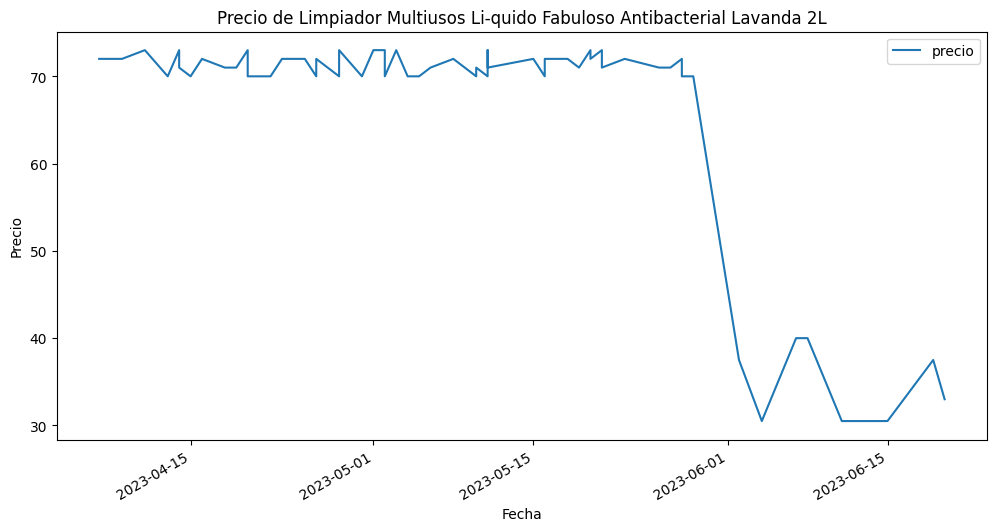

In [172]:
#grafiicar los datos por fecha y precio

#convertir a datetime la columna fecha
df['fecha'] = pd.to_datetime(df['fecha'])

#convertir a numero la columna precio
df['precio'] = pd.to_numeric(df['precio'])



df.plot(x='fecha', y='precio', figsize=(12,6))
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio de Limpiador Multiusos Li­quido Fabuloso Antibacterial Lavanda 2L')
plt.show()

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


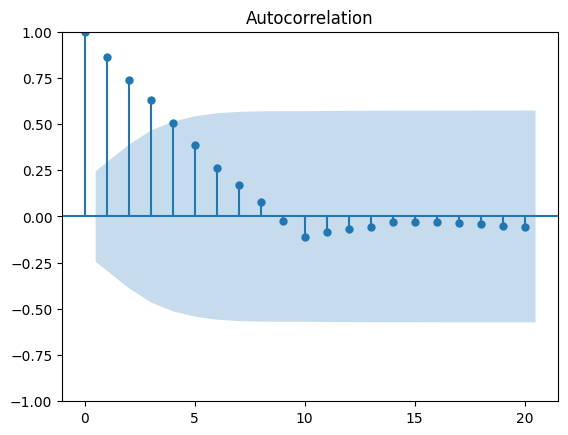

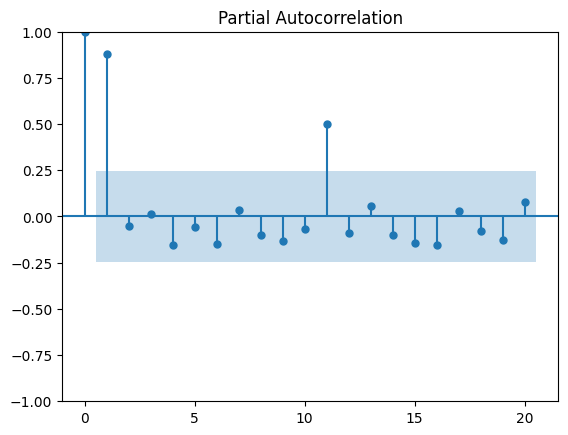

In [168]:
#crear un grafico de autocorrelacion y autocorrelacion parcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['precio'], lags=20)
plot_pacf(df['precio'], lags=20)
plt.show()


In [169]:
#prueba de Dickey-Fuller aumentada (ADF)
#H0: la serie de tiempo no es estacionaria
#H1: la serie de tiempo es estacionaria
#si p-value < 0.05 rechazamos H0
#si p-value > 0.05 no rechazamos H0

def prueba_adf(df):
    result = adfuller(df)
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('La serie de tiempo es estacionaria')
    else:
        print('La serie de tiempo no es estacionaria')

prueba_adf(df['precio'])


p-value: 0.003125
La serie de tiempo es estacionaria


c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

RMSE: 3.3043543040380685


c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


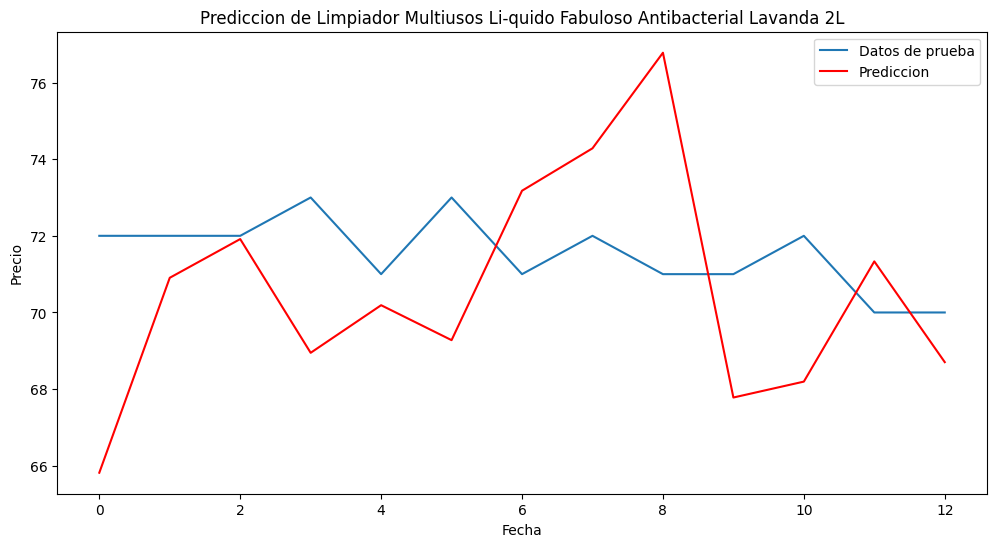

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import pickle

# Convertir la columna precio a un array
X = df['precio'].values

# Dividir el array en 80% para entrenamiento y 20% para prueba
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

# Entrenar el modelo
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = SARIMAX(history, order=(4, 1, 11))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

# Calcular el error cuadrático medio (RMSE)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Graficar la prediccion con los datos de prueba
plt.figure(figsize=(12, 6))
plt.plot(test, label='Datos de prueba')
plt.plot(predictions, color='red', label='Prediccion')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Prediccion de Limpiador Multiusos Li­quido Fabuloso Antibacterial Lavanda 2L')
plt.legend()
plt.show()

# Guardar el modelo en un archivo .pkl
with open('modelo_arima.pkl', 'wb') as f:
    pickle.dump(model_fit, f)
